In [9]:
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable


In [66]:
# import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # Missing Data - Data  Visualization
from collections import Counter #Counting

In [3]:
# Load the dataset

df = pd.read_csv(r"C:\Users\BUYPC COMPUTERS\Desktop\10Alytics\Course\WMDI VIDEOS\Assignment 5 - EDA\Dune Sales Data - Dune Sales Data.csv")

In [4]:
df.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50
2,27-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00
3,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50
4,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67


In [6]:
df.tail()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34862,7-Feb-16,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,2.0,1160.0,985.50
34863,13-Mar-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2049.0,1583.00
34864,5-Apr-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,3.0,683.0,560.67
34865,30-Aug-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2320.0,1568.00
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Dimensionality
df.shape

(34867, 12)

In [7]:
# Examine the columns/Features of the data
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price'],
      dtype='object')

In [9]:
# Investigate the dataset for anomalies and data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34866 non-null  object 
 1   Customer          34866 non-null  object 
 2   Sales Person      34866 non-null  object 
 3   Customer_Age      34867 non-null  int64  
 4   Customer_Gender   34866 non-null  object 
 5   State             34866 non-null  object 
 6   Product_Category  34866 non-null  object 
 7   Sub_Category      34866 non-null  object 
 8   Payment Option    34866 non-null  object 
 9   Quantity          34866 non-null  float64
 10  Unit_Cost         34866 non-null  float64
 11  Unit_Price        34866 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 3.2+ MB


In [10]:
# Numerical Statistical Analysis
df.describe()

,Customer_Age,Quantity,Unit_Cost,Unit_Price
count,34867.000000,34866.000000,34866.000000,34866.000000
mean,36.382683,2.002524,349.880567,389.232473
std,11.112813,0.813936,490.015846,525.319097
min,17.000000,1.000000,0.670000,0.670000
25%,28.000000,1.000000,45.000000,53.670000
50%,35.000000,2.000000,150.000000,179.000000
75%,44.000000,3.000000,455.000000,521.000000
max,87.000000,3.000000,3240.000000,5082.000000


In [13]:
# Categorical Statistical Analysis
df.describe(include=["object","bool"])

,Date,Customer,Sales Person,Customer_Gender,State,Product_Category,Sub_Category,Payment Option
count,34866,34866,34866,34866,34866,34866,34866,34866
unique,576,4,7,2,36,3,17,3
top,1-Mar-16,Low,Remota,F,Lagos,Accessories,Keyboard,Cash
freq,196,13041,6667,17439,10332,22534,11112,15911


## Dealing with missing data -

In [15]:
# Investigate the missing data
null_vals = df.isnull().sum()
null_vals

Date                1
Customer            1
Sales Person        1
Customer_Age        0
Customer_Gender     1
State               1
Product_Category    1
Sub_Category        1
Payment Option      1
Quantity            1
Unit_Cost           1
Unit_Price          1
dtype: int64

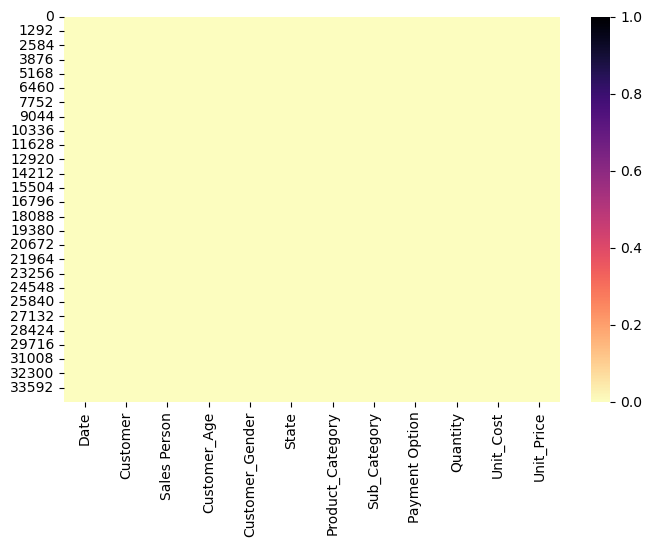

In [23]:
#Visualize the missing data
plt.figure(figsize = (8,5))
sns.heatmap(df.isnull(), cbar = True, cmap='magma_r');

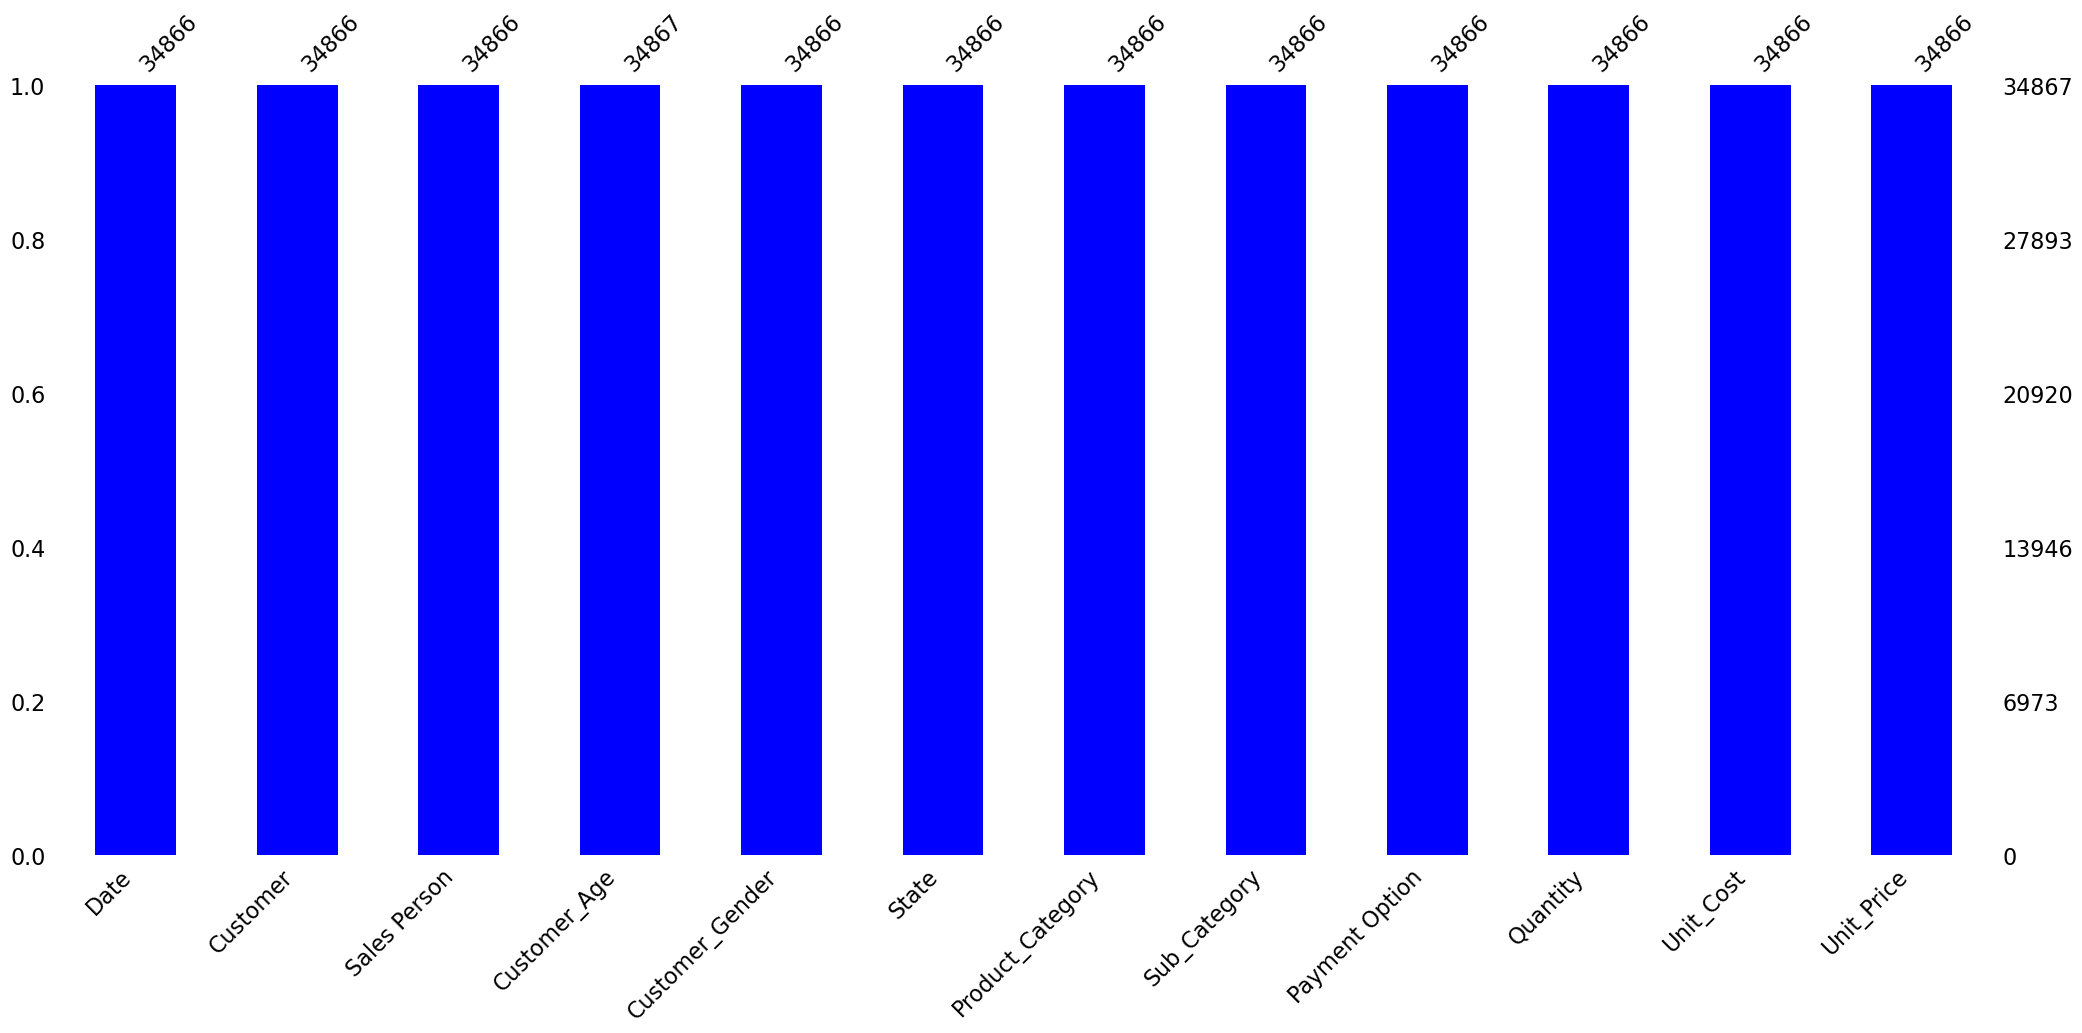

In [24]:
msno.bar(df, color='blue');

In [28]:
# Display where missing data exist in the data

df[df.isnull().any(axis=1)]

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#Drop the missing data
df.dropna(inplace=True)

In [30]:
# DateTime Analysis
df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5


In [35]:
# Convert the date column into a pandas datetime object
df["Date"] = pd.to_datetime(df["Date"])

#Extract the Year, Month, Quarter
df['year'] = df["Date"].dt.year
df['month'] = df["Date"].dt.month
df['month_name'] = df["Date"].dt.month_name()
df['quarter'] = df["Date"].dt.quarter

df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,2016,2,February,1
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,2016,2,February,1


In [38]:
# Group Customer Age
def age_group(x):
    if x <= 25:
        return "<=25 Young Adult"
    elif x <= 40:
        return "25-40 Adult"
    elif x <= 50:
        return "41-50 Old Adult"
    else:
        return ">=51 Elders"
    
#Apply function to the data
df["age.group"] = df["Customer_Age"].apply(age_group)
df.head(5)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter,age.group
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00,2016,2,February,1,25-40 Adult
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50,2016,2,February,1,25-40 Adult
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00,2016,2,February,1,25-40 Adult
3,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50,2016,3,March,1,25-40 Adult
4,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67,2016,3,March,1,25-40 Adult


In [41]:
#Cost Revenue and Profit Calculation
df["cost"] = df["Quantity"]*df["Unit_Cost"]
df["revenue"] = df["Quantity"]*df["Unit_Price"]
df["Profit/Loss"] = df["revenue"]-df["cost"]

df.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter,age.group,cost,revenue,Profit/Loss
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00,2016,2,February,1,25-40 Adult,80.00,109.00,29.00
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50,2016,2,February,1,25-40 Adult,49.00,57.00,8.00
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00,2016,2,February,1,25-40 Adult,11.01,15.00,3.99
3,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50,2016,3,March,1,25-40 Adult,175.00,233.00,58.00
4,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67,2016,3,March,1,25-40 Adult,105.00,125.01,20.01


In [45]:
#Profit/Loss grouping
def porl(x):
    if x >= 0:
        return "Profit"
    else:
        return "Loss"
    
df["Profit_label"] = df["Profit/Loss"].apply(porl)

df.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,year,month,month_name,quarter,age.group,cost,revenue,Profit/Loss,Profit_label
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,...,109.00,2016,2,February,1,25-40 Adult,80.00,109.00,29.00,Profit
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,...,28.50,2016,2,February,1,25-40 Adult,49.00,57.00,8.00,Profit
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,...,5.00,2016,2,February,1,25-40 Adult,11.01,15.00,3.99,Profit
3,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,...,116.50,2016,3,March,1,25-40 Adult,175.00,233.00,58.00,Profit
4,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,...,41.67,2016,3,March,1,25-40 Adult,105.00,125.01,20.01,Profit


## Univariate Analysis
- Categorical Column Features - Data Visualization
- Numerical Column Features - Data Visualization

### Categorical Univariate Analysis

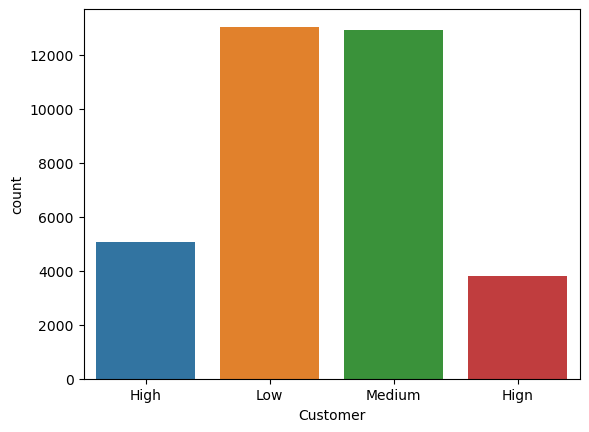

In [49]:
#How many customers below in each customer spec
sns.countplot(x='Customer', data=df);

In [50]:
# Investigate the column affected
df[df['Customer'] == 'Hign']. head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,year,month,month_name,quarter,age.group,cost,revenue,Profit/Loss,Profit_label
29770,2015-08-03,Hign,Derick,28,F,Lagos,Phones,IPhone,Cash,1.0,...,2136.00,2015,8,August,3,25-40 Adult,2295.00,2136.00,-159.00,Loss
29771,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,2.0,...,19.50,2015,8,August,3,25-40 Adult,35.00,39.00,4.00,Profit
29772,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,3.0,...,18.67,2015,8,August,3,25-40 Adult,50.01,56.01,6.00,Profit
29773,2015-08-10,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,1.0,...,69.00,2015,8,August,3,25-40 Adult,60.00,69.00,9.00,Profit
29774,2015-08-25,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,3.0,...,47.00,2015,8,August,3,25-40 Adult,125.01,141.00,15.99,Profit


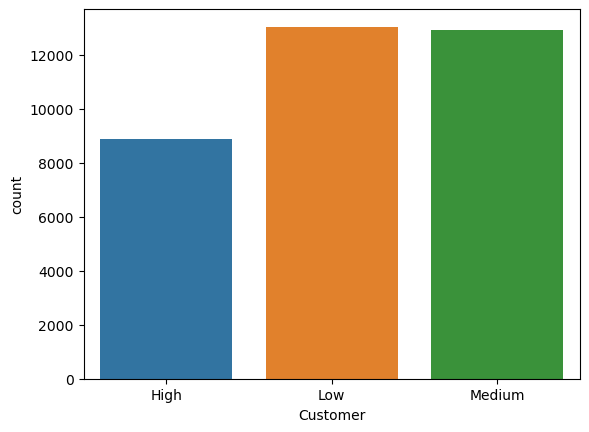

In [51]:
#Correct the Spelling of HIGN
df.loc[df['Customer'] == 'Hign', 'Customer'] = 'High'
sns.countplot(x='Customer', data=df);

In [52]:
#Count of Column Values

df['Customer'].value_counts()

Low       13041
Medium    12926
High       8899
Name: Customer, dtype: int64

#### Narration about your observations

Most of the Customers are in the Low Spec Category

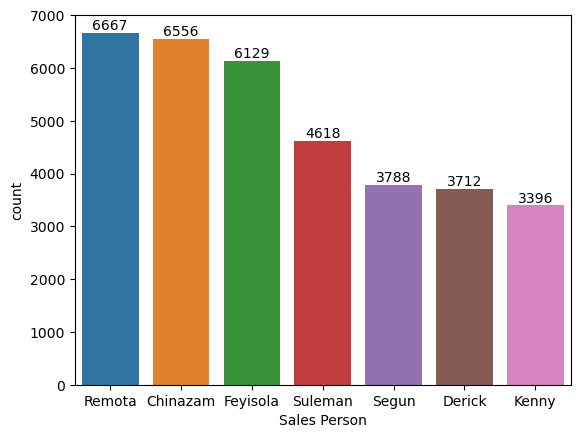

In [56]:
#Sales Person - How many transaction by sales person
ax = sns.countplot(x= df['Sales Person'], order = df['Sales Person'].value_counts(ascending=False).index)
values = df['Sales Person'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

#### Narration about your observations

Remota appears to be the Sales Person with the highest transaction completed (6667 Transactions completed) and Kenny is the lowest with 3396 Transactions completed.

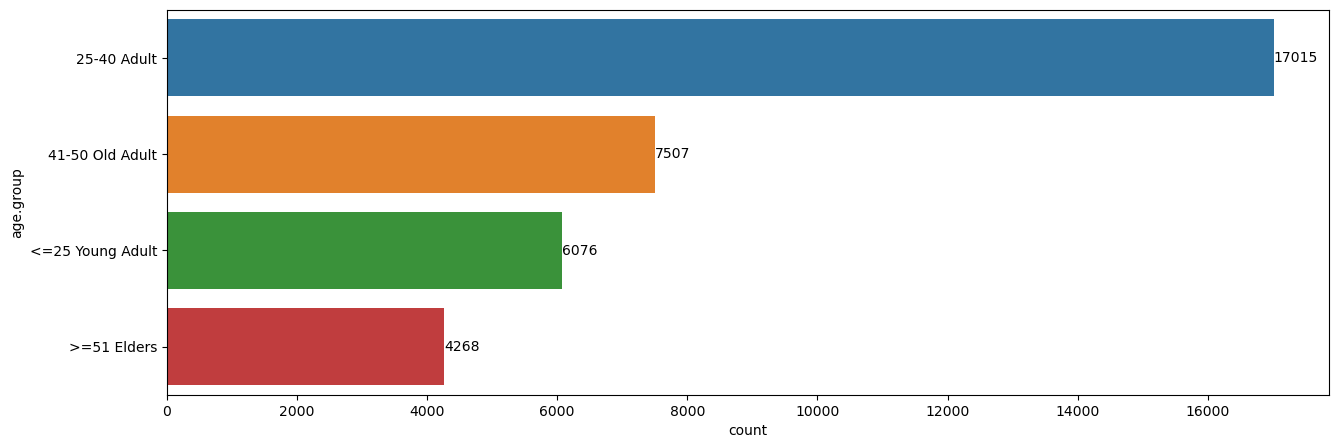

In [98]:
# Total transactions by Customer Age Group
plt.figure(figsize= (15,5))

ax = sns.countplot(y= df['age.group'], order = df['age.group'].value_counts(ascending=False).index)
values = df['age.group'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

#### Narration about your observations

Customer Age Group falls mostly within the age of 25-40 Adults

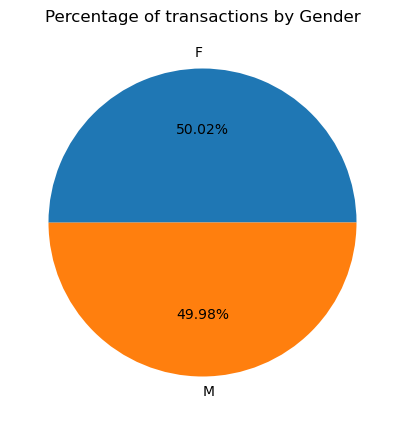

In [74]:
# Total Transactions by Customer Gender

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(df['Customer_Gender'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of transactions by Gender")
plt.show()

#### Narration about your observations

Customer Gender is relatively balanced

Lagos        10332
Abuja         6421
Abia          5206
Adamawa       2446
Akwa Ibom     1287
Edo           1229
Anambra       1171
Bauchi        1112
Bayelsa       1092
Benue          869
Name: State, dtype: int64


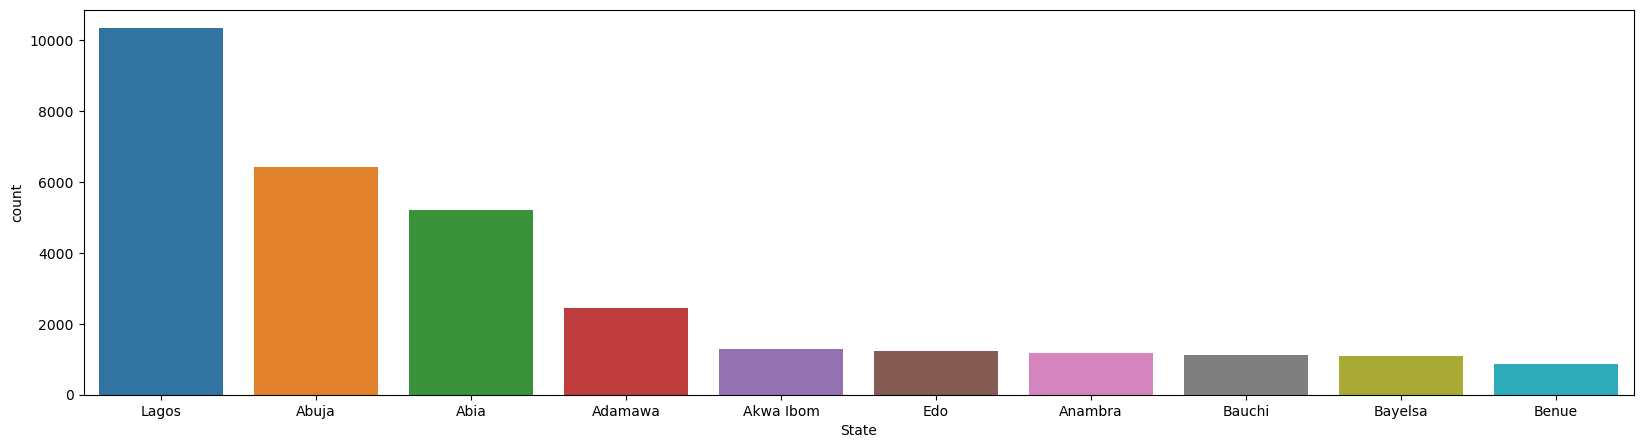

In [92]:
# total transaction by State
plt.figure(figsize=(20,5))

top10 = df['State'].value_counts().head(10)

sns.countplot(x='State', data = df, order=top10.index);
print(top10)

#### Narration about your observations
Out of the Top 10 states, Lagos has the highest transaction with 10332

- Product_Category
- Sub_Category
- Payment Option
- month_name

Accessories    22534
Phones          7093
Clothing        5239
Name: Product_Category, dtype: int64


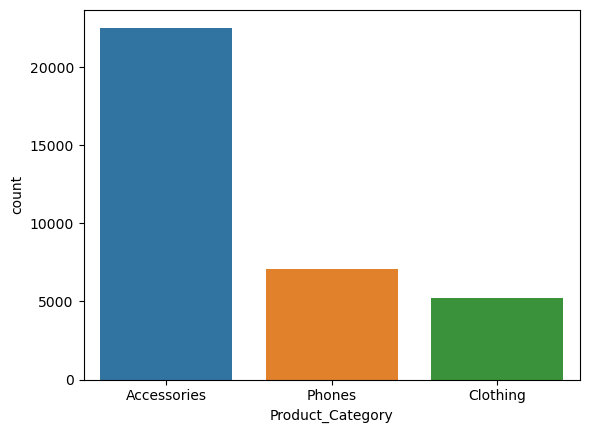

In [114]:
# Product Category

sns.countplot(x=df['Product_Category'], order = df['Product_Category'].value_counts(ascending=False).index)
values = df['Product_Category'].value_counts()
print (values)

#### Narration about your observations
In the Product Category, Accessories made the highest sales with 22534 transactions

Keyboard          11112
Ear Piece          5295
Wrist Watch        4176
Samsung            3022
IPhone             2737
Jerseys            2000
Tshirts            1517
Infinix            1334
Screen Guard        762
Shorts              566
Memory Card         545
Polo shirts         480
Mouse               396
Socks               364
Vests               312
Laptop Charger      145
Phone Charger       103
Name: Sub_Category, dtype: int64


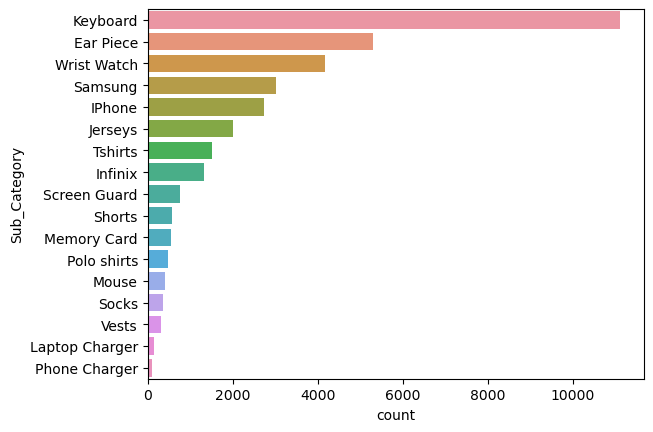

In [113]:
# Sub Category

sns.countplot(y='Sub_Category', data = df, order = df['Sub_Category'].value_counts(ascending=False).index)
values = df['Sub_Category'].value_counts()
print (values)

#### Narration about your observations
In the Sub Category, Keyboard made the highest sales with 11112 transactions

Cash      15911
POS       11013
Online     7942
Name: Payment Option, dtype: int64


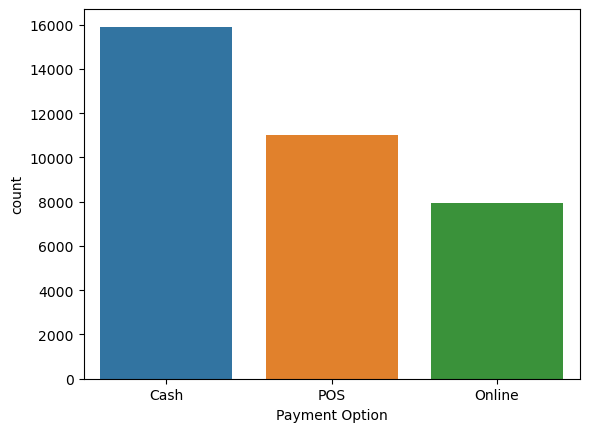

In [115]:
# Payment Option

sns.countplot(x='Payment Option', data = df, order = df['Payment Option'].value_counts(ascending=False).index);
values = df['Payment Option'].value_counts()
print (values)

#### Narration about your observations
In the Payment Option, Cash payments was the highest with 15911 transactions meaning most transactions were done by cash payments

June         3680
May          3676
December     3414
April        3283
March        3155
January      2907
February     2887
October      2554
November     2488
August       2304
September    2303
July         2215
Name: month_name, dtype: int64


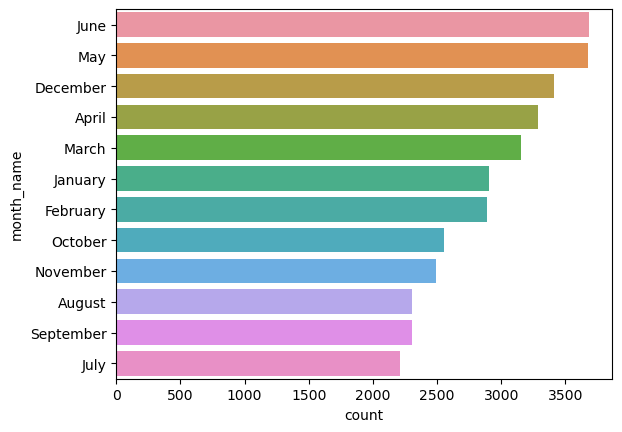

In [119]:
# Month name

sns.countplot(y='month_name', data = df, order = df['month_name'].value_counts(ascending=False).index);
values = df['month_name'].value_counts()
print (values)

#### Narration about your observations
The Month of June recorded the highest Sales and July the lowest 

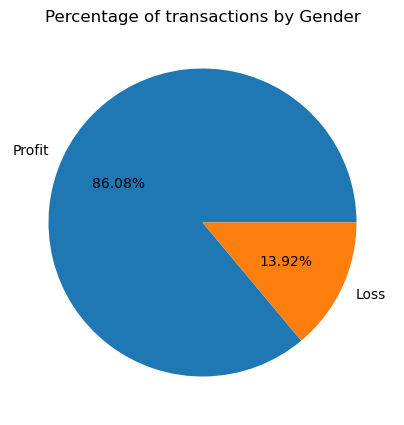

In [122]:
# Total Transaction by Profit or Loss

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(df['Profit_label'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of transactions by Gender")
plt.show()

#### Narration about your observation

Company made 86.08% profit and 13.92% loss

### Numerical Univariate Analysis

Text(0.5, 1.0, 'Hist Plot on Profit/Loss')

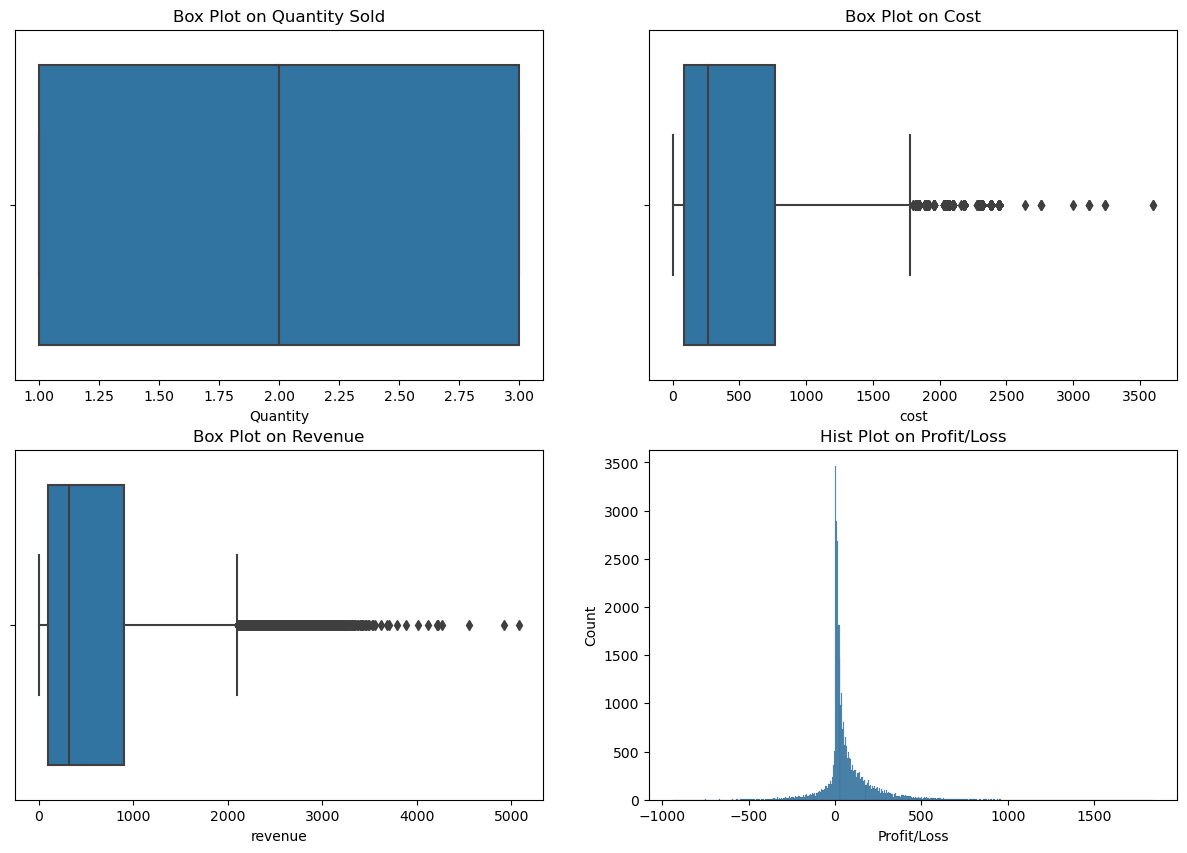

In [135]:
#Quantity, Cost, Revenue and Profit - Subplot

fig, axs = plt.subplots(2, 2, figsize = (15,10))

sns.boxplot(x='Quantity', data=df, ax=axs[0,0])
axs[0,0].set_title("Box Plot on Quantity Sold")

sns.boxplot(x='cost', data=df, ax=axs[0,1])
axs[0,1].set_title("Box Plot on Cost")

sns.boxplot(x='revenue', data=df, ax=axs[1,0])
axs[1,0].set_title("Box Plot on Revenue")

sns.histplot(x='Profit/Loss', data=df, ax=axs[1,1])
axs[1,1].set_title("Hist Plot on Profit/Loss")

## Bivariate Analysis
- Focus on Profit

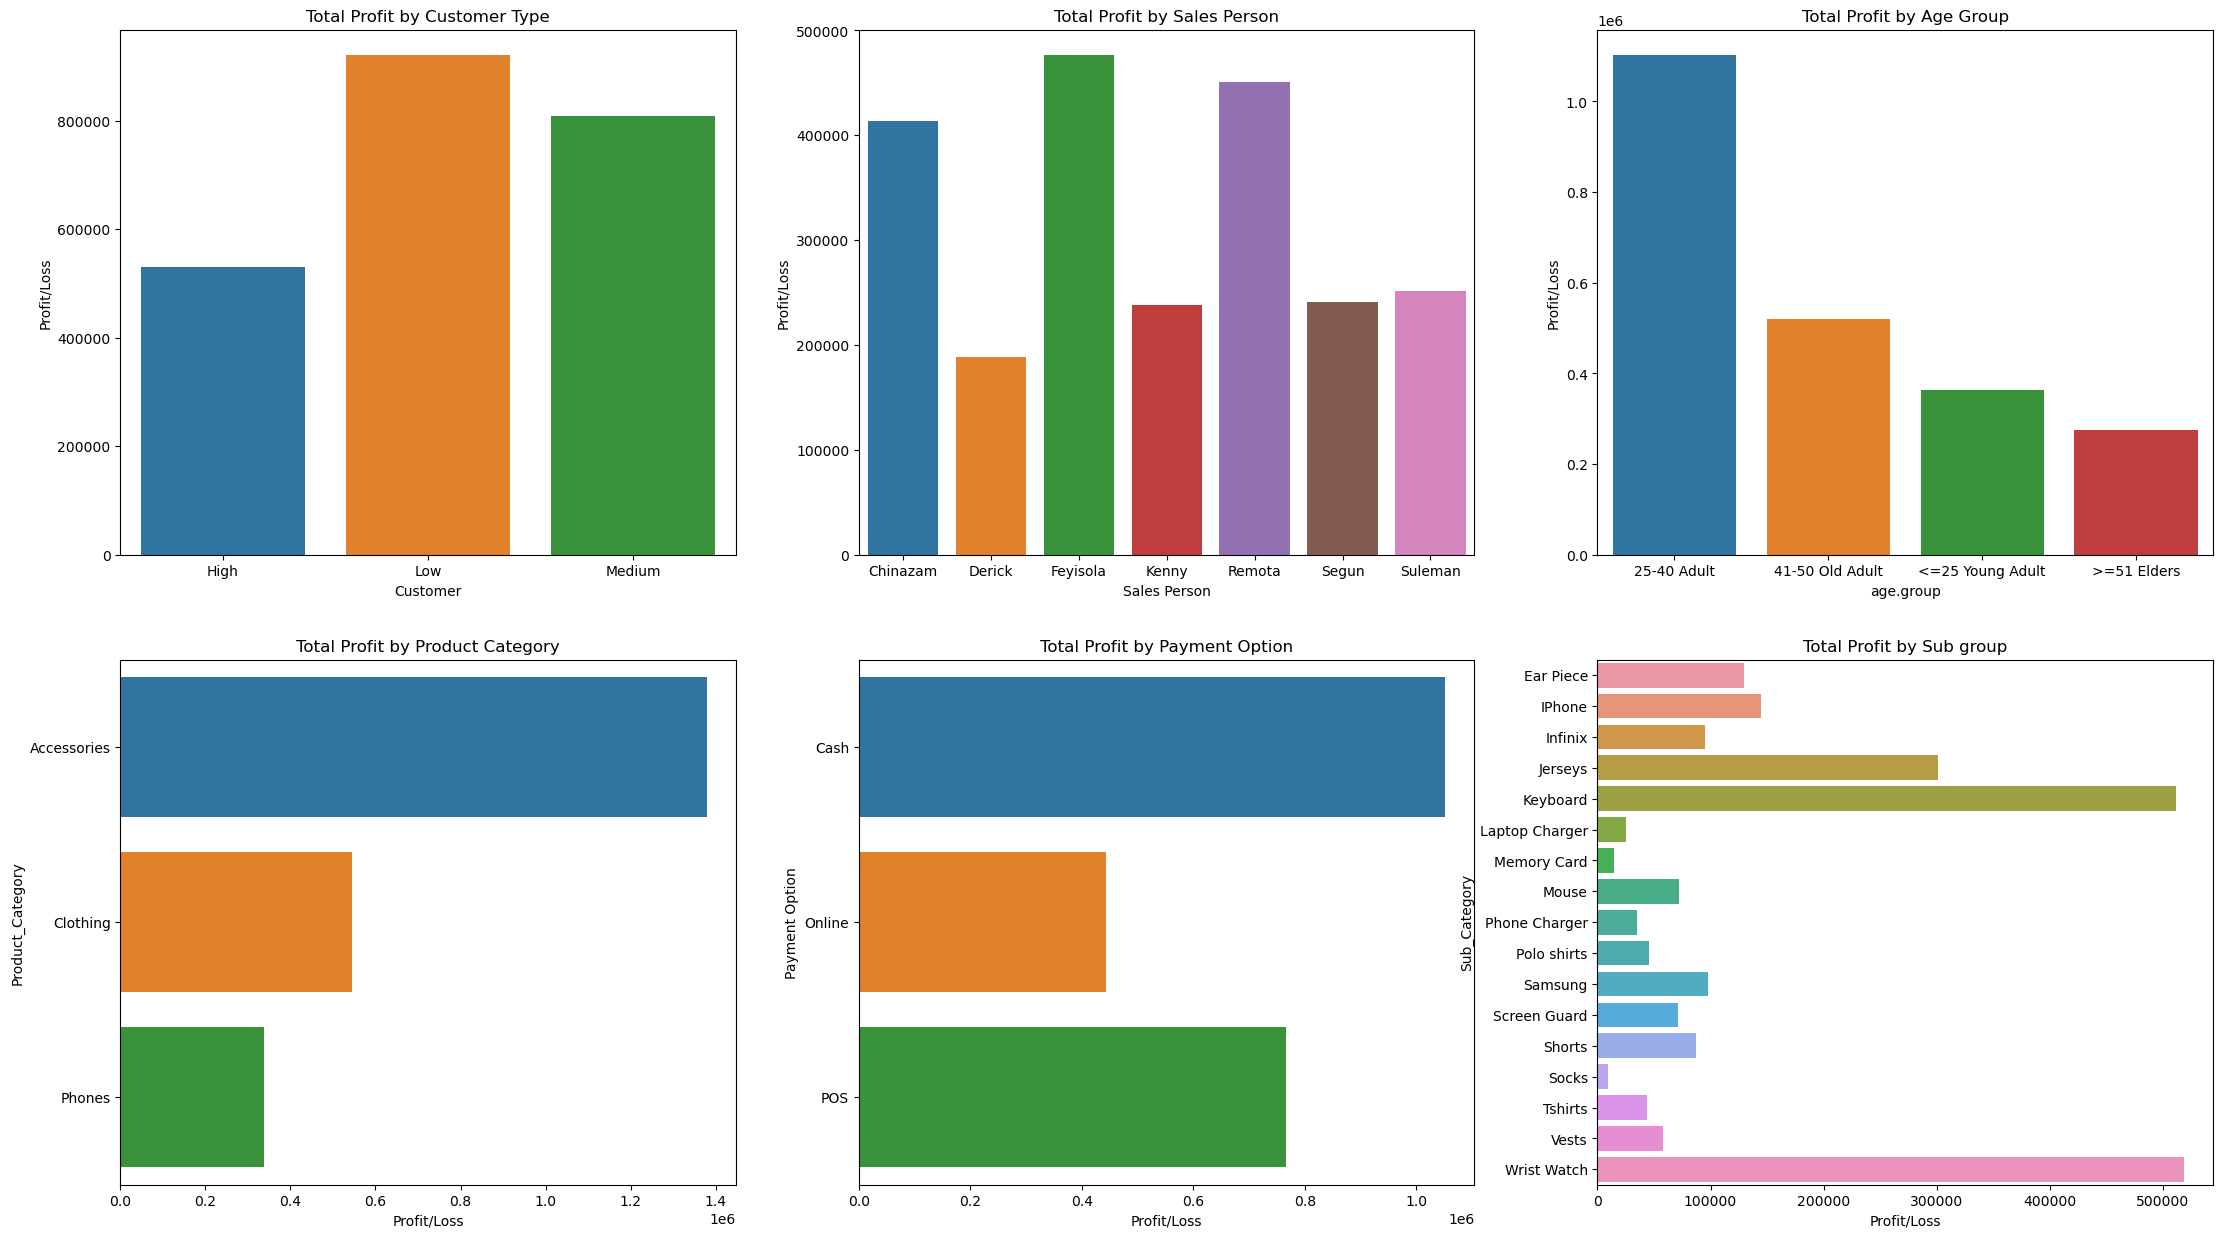

In [163]:
fig, axs = plt.subplots(2,3, figsize = (27,15))

cust_prof = df.groupby('Customer')['Profit/Loss'].sum().reset_index()
sns.barplot(x='Customer', y='Profit/Loss', data=cust_prof, ax=axs[0,0])
axs[0,0].set_title("Total Profit by Customer Type")

sp_prof = df.groupby('Sales Person')['Profit/Loss'].sum().reset_index()
sns.barplot(x='Sales Person', y='Profit/Loss', data=sp_prof, ax=axs[0,1])
axs[0,1].set_title("Total Profit by Sales Person")

age_prof = df.groupby('age.group')['Profit/Loss'].sum().reset_index()
sns.barplot(x='age.group', y='Profit/Loss', data=age_prof, ax=axs[0,2])
axs[0,2].set_title("Total Profit by Age Group")

pc_prof = df.groupby('Product_Category')['Profit/Loss'].sum().reset_index()
sns.barplot(y='Product_Category', x='Profit/Loss', data=pc_prof, ax=axs[1,0])
axs[1,0].set_title("Total Profit by Product Category")

po_prof = df.groupby('Payment Option')['Profit/Loss'].sum().reset_index()
sns.barplot(y='Payment Option', x='Profit/Loss', data=po_prof, ax=axs[1,1])
axs[1,1].set_title("Total Profit by Payment Option")

sc_prof = df.groupby('Sub_Category')['Profit/Loss'].sum().reset_index()
sns.barplot(y='Sub_Category', x='Profit/Loss', data=sc_prof, ax=axs[1,2])
axs[1,2].set_title("Total Profit by Sub group")

plt.show()

#### Narration about your observations

- Low Customer Type with the highest count made the highest profit
- Although Remota made the highest number of transactions, Feyinsola recorded the highest profit
- Age group of 25-40 Adult with highest number of transactions also recorded the highest profit 
- Accessories in te product category with the highest number of transactions also recorded the highest profit
- Cash payment method(mostly used) still recorded higehst profit
- In the sub category, Although Keyboard was mostly sold, Wrist Watch recorded the highest profit.

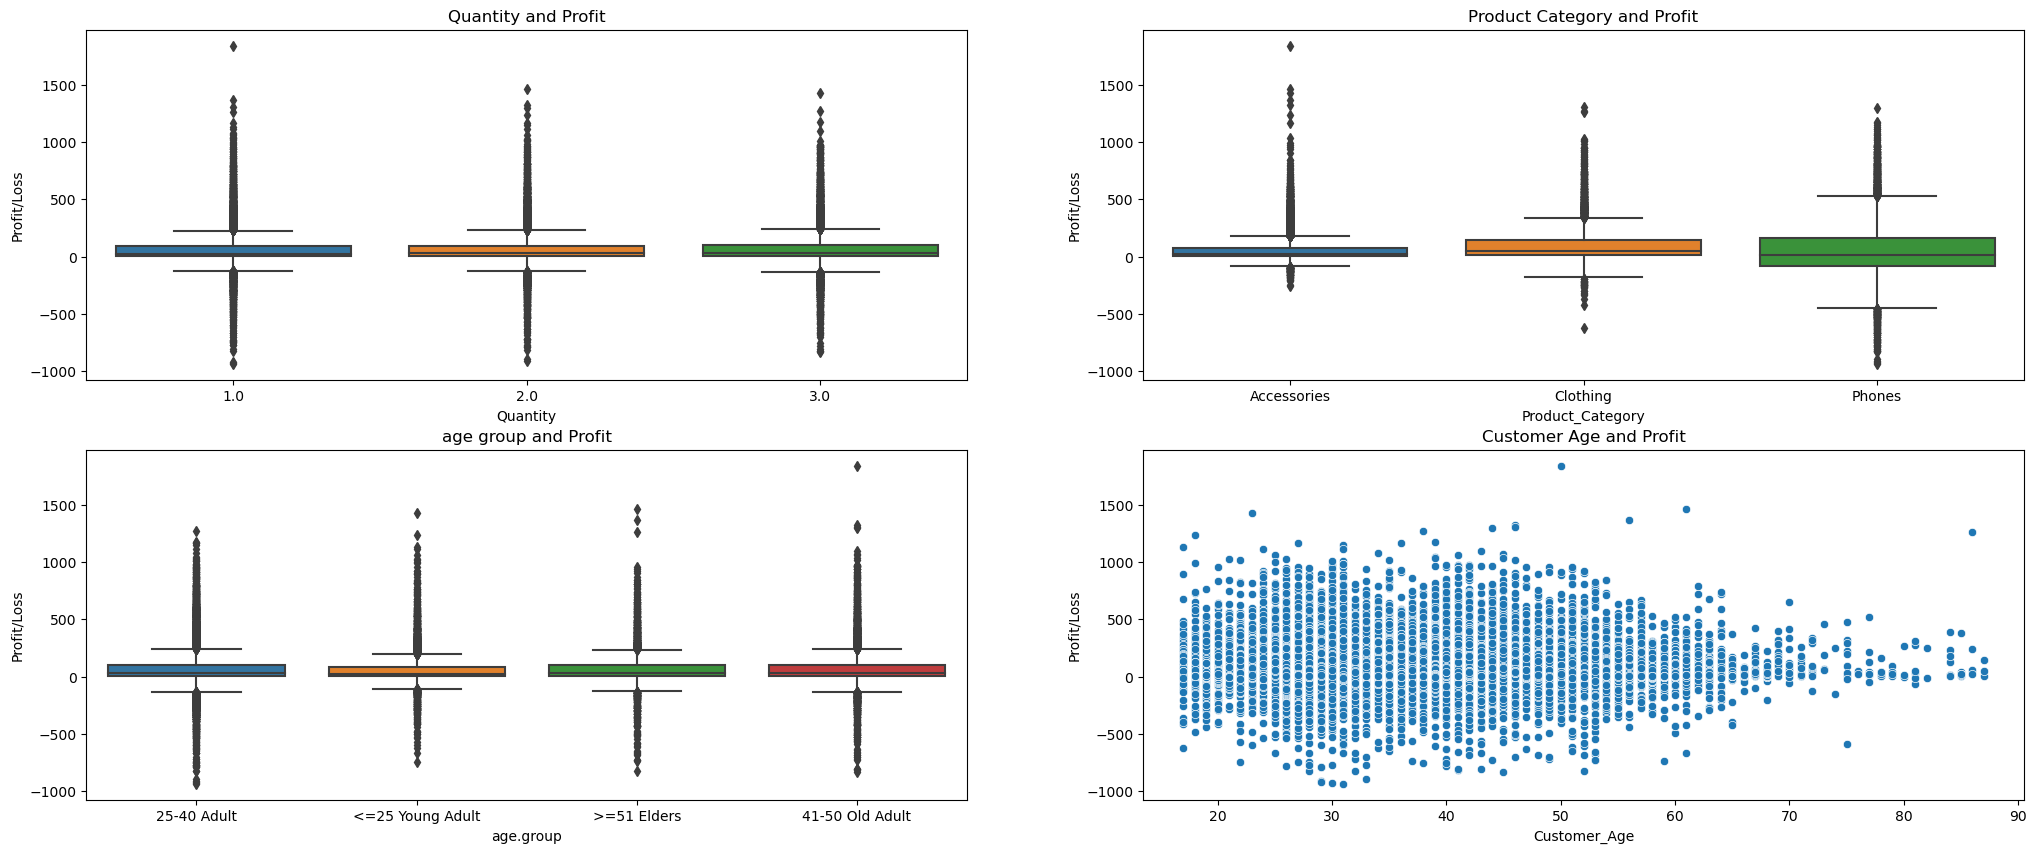

In [171]:
# Numerical Columns

#Quantity, Cost, Revenue and Profit

fig, axs = plt.subplots(2,2, figsize = (25,10))

sns.boxplot(x='Quantity', y='Profit/Loss', data=df, ax=axs[0,0])
axs[0,0].set_title("Quantity and Profit")

sns.boxplot(x='Product_Category', y='Profit/Loss', data=df, ax=axs[0,1])
axs[0,1].set_title("Product Category and Profit")

sns.boxplot(x='age.group', y='Profit/Loss', data=df, ax=axs[1,0])
axs[1,0].set_title("age group and Profit")

sns.scatterplot(x='Customer_Age', y='Profit/Loss', data=df, ax=axs[1,1])
axs[1,1].set_title("Customer Age and Profit")

plt.show()

#### Narration about your observations



## Multivariate Analysis
three or more columns

In [47]:
col = df.columns
info = df.info()
print(col)
print(info)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34866 entries, 0 to 34865
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              34866 non-null  datetime64[ns]
 1   Customer          34866 non-null  object        
 2   Sales Person      34866 non-null  object        
 3   Customer_Age      34866 non-null  int64         
 4   Customer_Gender   34866 non-null  object        
 5   State             34866 non-null  object        
 6   Product_Category  34866 non-null  object        
 7   Sub_Category      34866 non-null  object        
 8   Payment Option    34866 non-null  object        
 9   Quantity          34866 non-null  float64       
 10  Unit_Cost         34866 non-null  float64       
 11  Unit_Price        34866 non-null  float64       
 12  year              34866 non-null  int64         
 13  month             34866 non-null  int64         
 14  month_name        3486

<Axes: xlabel='Product_Category', ylabel='Total'>

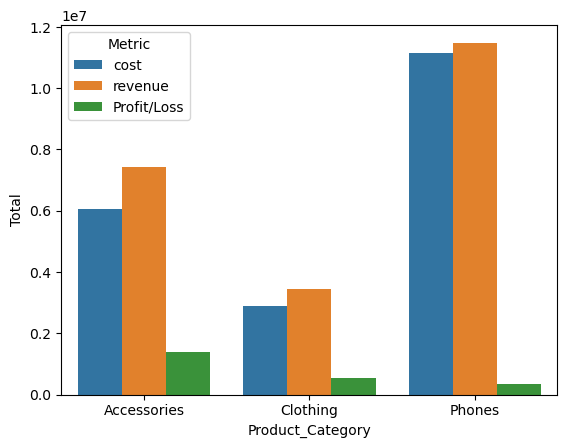

In [176]:
#Product Category against cost, revenue and profit
procat = df.groupby("Product_Category")[['cost', 'revenue', 'Profit/Loss']].sum().reset_index()
procat = pd.melt(procat, id_vars="Product_Category", var_name="Metric", value_name = "Total")
sns.barplot(data=procat, x='Product_Category', y='Total', hue = "Metric")

<Axes: xlabel='month', ylabel='Profit/Loss'>

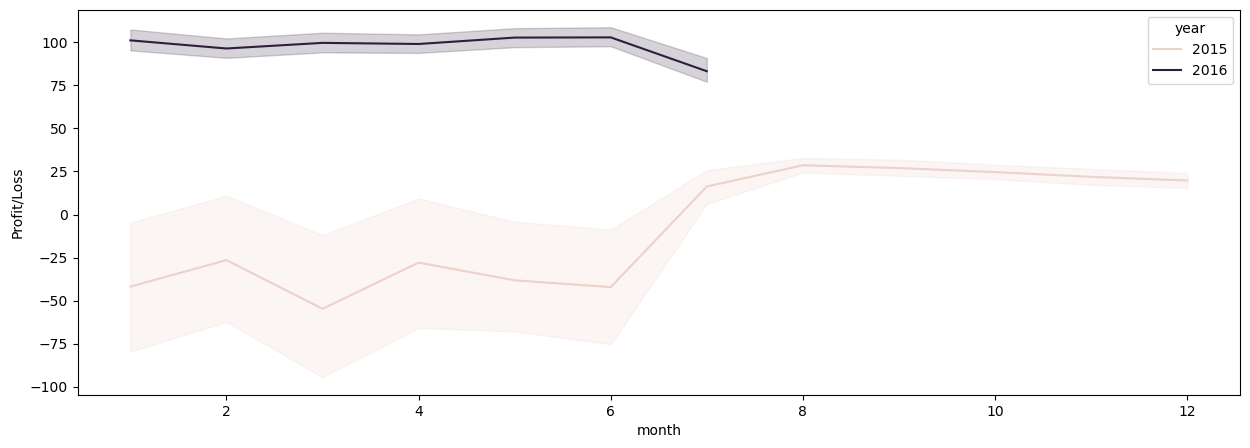

In [179]:
plt.figure(figsize=(15,5))

sns.lineplot(x="month", y='Profit/Loss', data=df, hue='year')

In [180]:
#Using Pivot table
df.pivot_table(values='Profit/Loss', index='year', columns='month', aggfunc='sum')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2015,-5778.70,-4079.65,-8163.79,-4945.69,-7801.45,-8690.61,15104.47,65926.24,62172.33,62950.66,54480.9,67448.12
2016,280204.25,263640.18,299777.67,307746.51,356915.59,357549.86,107151.79,NaN,NaN,NaN,NaN,NaN


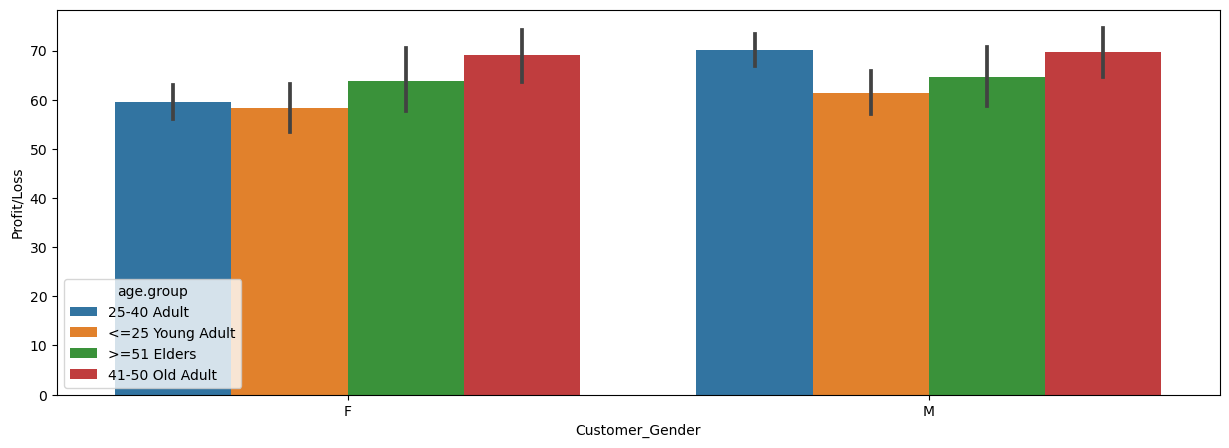

In [181]:
#Customer Gender, Age group and Profit
plt.figure(figsize=(15,5))
sns.barplot(x='Customer_Gender', y= 'Profit/Loss', data=df, hue='age.group');

C:\Users\BUYPC COMPUTERS\AppData\Local\Temp\ipykernel_4204\543924292.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  a = df.corr()


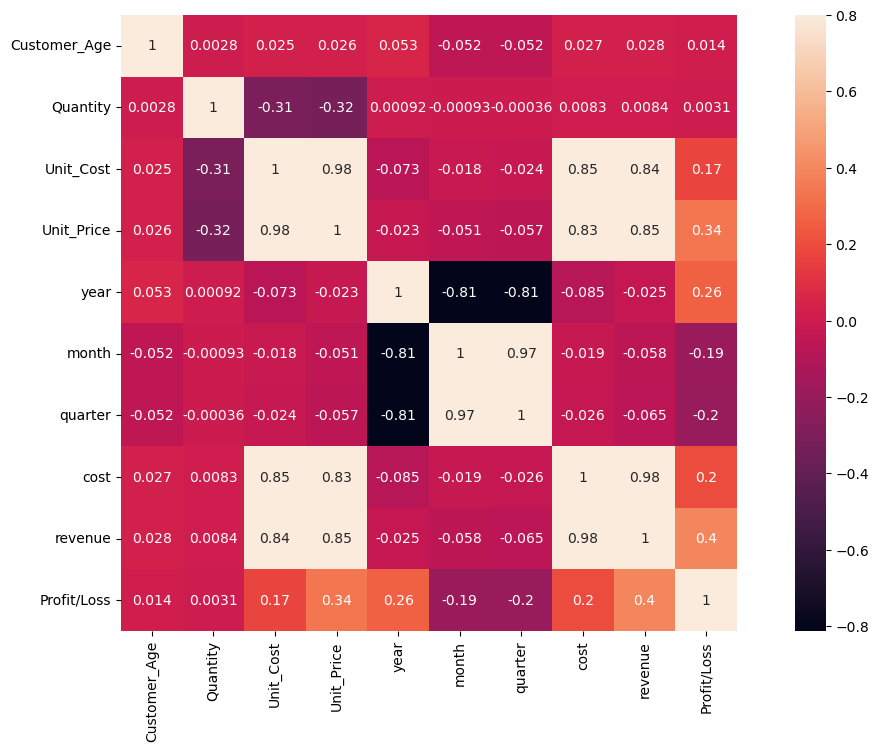

In [190]:
#Correlation

a = df.corr()
figure = plt.subplots(figsize=(15,8))
sns.heatmap(a, vmax=.8, square=True, annot=True);


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


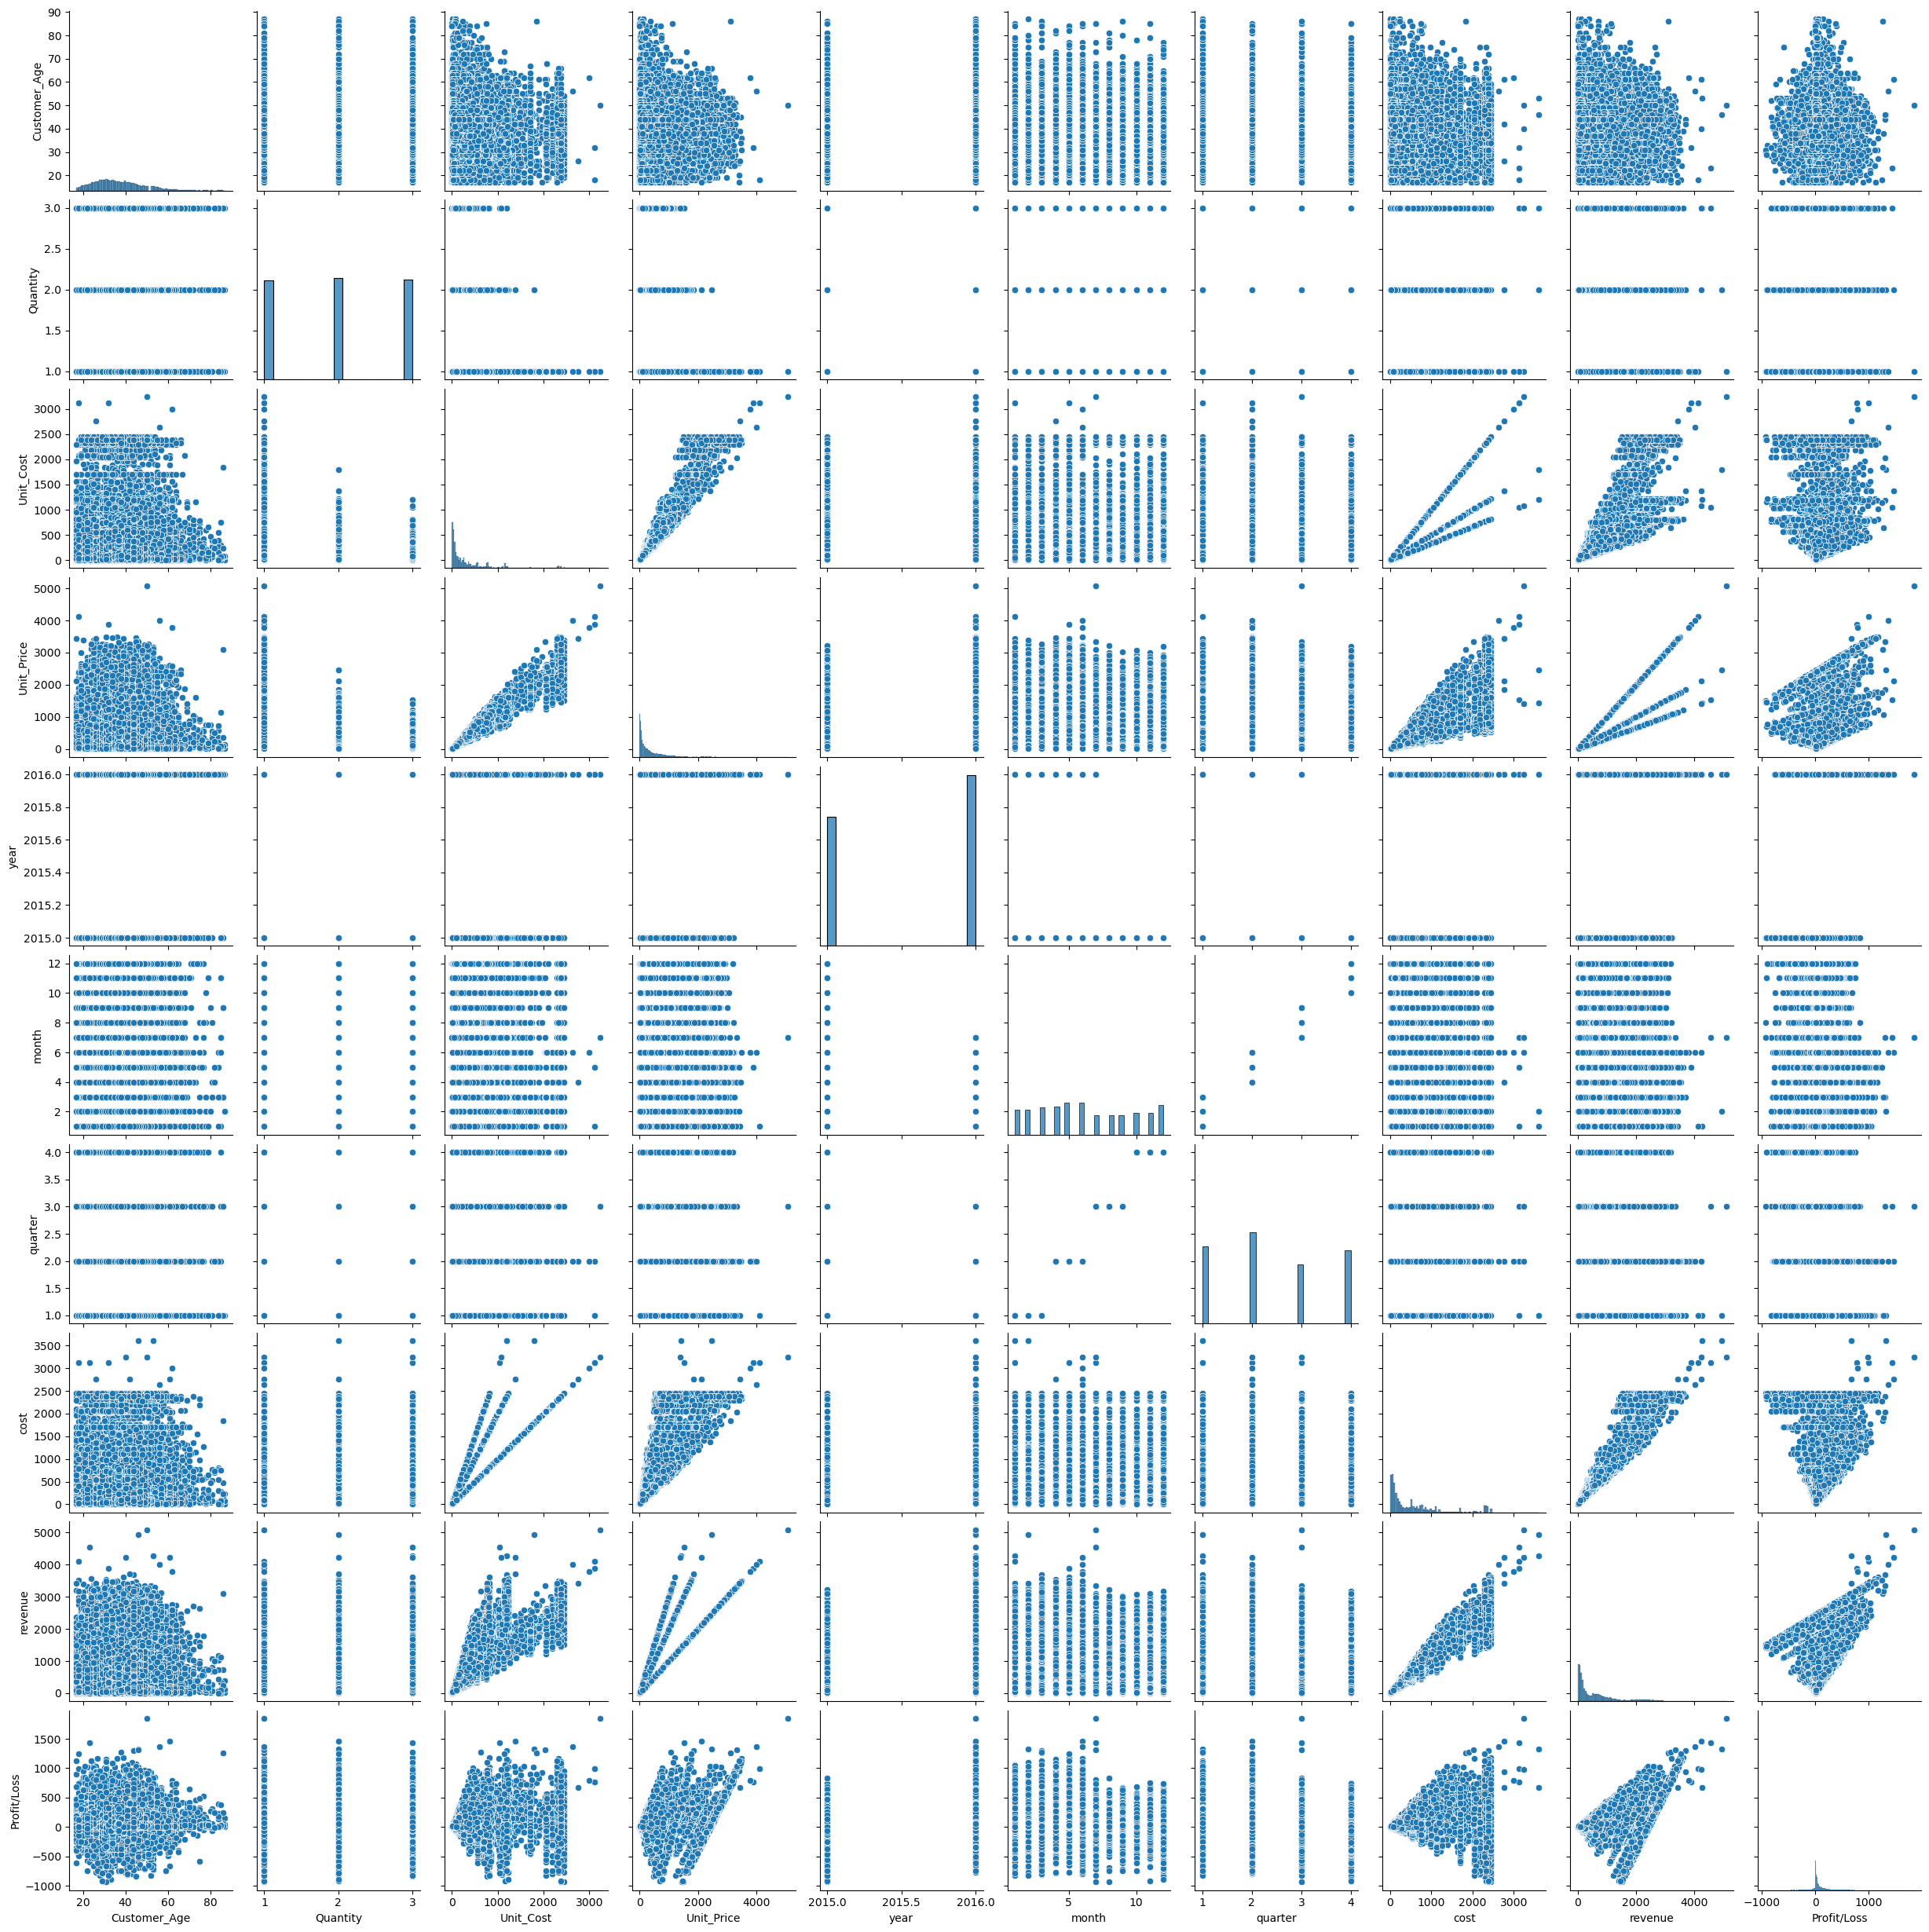

In [191]:
sns.pairplot(df, size=2.5);